In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [2]:
with open("mnist_data.pkl","rb") as f:
    new_dict = pickle.load(f)
    
train_y, test_X, test_y, train_X  = np.asarray(new_dict['trainLabels']), np.asarray(new_dict['testImages']), np.asarray(new_dict['testLabels']), np.asarray(new_dict['trainImages'])

In [3]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((800, 784), (200, 784), (800,), (200,))

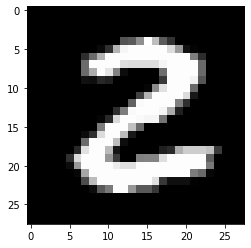

In [4]:
t = train_X[25].reshape(28,28)
plt.imshow(t, cmap='gray')

# Network architecture - 

Input layer - 784 neurons (28*28 pixels - 1 image)

Hidden layer - Nh (100 neurons - initially)

Output layer - 10 neurons (0-9)

# So weight and bias matrices 
-> W1 = 784 x 100 ; b1 = 100 x 1

-> W2 = 100 x 10 ; b2 = 10 x 1

-> X = 800 x 784, Y = 800 x 1 

In [5]:
z = np.max(train_y) + 1
y_new = np.eye(z)[train_y] #hot encoding of y
y_new 

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def sigmoid_derv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softMax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def error(y_hat,y):
    n_samples = y.shape[0]
    logp = -np.log(y_hat[np.arange(n_samples), np.argmax(y, axis=1)])
    loss = np.sum(logp)/n_samples
    return loss
def mse(y,y_hat):
    return np.sum((np.power((y - y_hat),2)))

def get_accuracy(y_hat, y):
    accuracy = 0
    y_max = np.argmax(y,axis=1)
    y_hat_max = np.argmax(y_hat, axis=1)
    n = y.shape[0]
    
    for i in range(n):
        accuracy += (y_max[i] == y_hat_max[i])
    return accuracy/n # accuracy in percentage


In [7]:
X = train_X
y = y_new
l = [] ; e = [] ; a = [];
alpha = 0.5

# Initializing weights
W1 = np.random.randn(784,100)
W2 = np.random.randn(100,10)
b1 = np.zeros(100)
b2 = np.zeros(10)
no_epoch = 3000

for epoch in range(3000):
     
    # Forward
    A1 = sigmoid(np.dot(X,W1)+b1)
    A2 = softMax(np.dot(A1,W2)+b2) 
    
    # error
    loss_value = mse(A2,y)
    accuracy = get_accuracy(A2,y)
    
    # derivatives
    del_A2 = (A2 - y)/y.shape[0]  #  cross_entropy of A2 and y
    
    del_Z1 = np.dot(del_A2,W2.T)
    del_A1 = del_Z1*sigmoid_derv(A1)
    
    dW2 = np.dot(A1.T,del_A2)
    db2 = np.sum(del_A2, axis=0, keepdims=True)
    dW1 = np.dot(X.T, del_A1)
    db1 = np.sum(del_A1, axis=0)
    
    # graadient descent
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    
    if epoch%100 == 0:
        print("Epoch - ", epoch, "; Loss - ", loss_value, ": Accuracy (%)- ", accuracy)
        l.append(loss_value) ; a.append(accuracy); e.append(epoch)
        

Epoch -  0 ; Loss -  1296.520884657294 : Accuracy (%)-  0.1025
Epoch -  100 ; Loss -  10.201062333872548 : Accuracy (%)-  0.99375
Epoch -  200 ; Loss -  5.027655727206017 : Accuracy (%)-  0.9975
Epoch -  300 ; Loss -  2.0887173851616874 : Accuracy (%)-  0.99875
Epoch -  400 ; Loss -  3.075062301191193 : Accuracy (%)-  0.9975
Epoch -  500 ; Loss -  1.9100836003260888 : Accuracy (%)-  1.0
Epoch -  600 ; Loss -  1.3338690964773745 : Accuracy (%)-  1.0
Epoch -  700 ; Loss -  1.3829551290443327 : Accuracy (%)-  1.0
Epoch -  800 ; Loss -  1.95209824791383 : Accuracy (%)-  0.99875
Epoch -  900 ; Loss -  3.21886986914898 : Accuracy (%)-  0.9975
Epoch -  1000 ; Loss -  1.2819821662338513 : Accuracy (%)-  1.0
Epoch -  1100 ; Loss -  0.4153259995437001 : Accuracy (%)-  1.0
Epoch -  1200 ; Loss -  4.199048137796743 : Accuracy (%)-  0.9975
Epoch -  1300 ; Loss -  1.667909680734908 : Accuracy (%)-  1.0
Epoch -  1400 ; Loss -  0.5617807174154023 : Accuracy (%)-  1.0
Epoch -  1500 ; Loss -  0.54458892

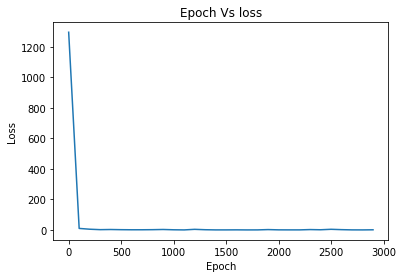

In [8]:
plt.title('Epoch Vs loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(e,l)
plt.show()

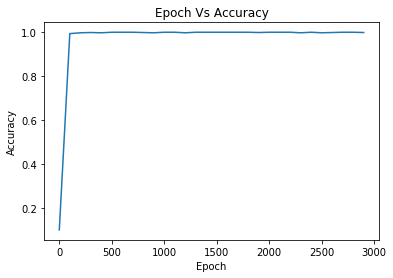

In [9]:
plt.title('Epoch Vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(e,a)
plt.show()

# Predicting test data

In [10]:
X = test_X; y = np.eye(np.max(test_y) + 1)[test_y] #hot encoding of y

A1 = sigmoid(np.dot(X,W1)+b1) 
A2 = softMax(np.dot(A1,W2)+b2) 
loss_value = error(A2,y)
accuracy = get_accuracy(A2,y)
print('Test data loss- ', loss_value, '; Accuracy - ', accuracy)

Test data loss-  1.4364780666944268 ; Accuracy -  0.82
